Este documento analiza el costo de oportunidad de una inversión argentina. Para saber cual será el retorno que tiene que solicitar un inversor al momento de decidir si le conviene o no invertir tanto en un activo financiero o un proyecto.
La primera medida a tener en cuenta es la inflación en la moneda, los pesos argentinos, como la moneda va perdiendo valor adquisitivo en el transcurso del tiempo. 
Este dato lo tenemos reflejado con la evolución del tipo de cambio (dolar/peso) a lo largo del tiempo. 
Tomamos como parametro la evolución de las ADRs argentinas. Agarrando una acción de YPF (YPFD.BA) argentina, dividida por su ADR americano YPF (YPF), obtenemos el dolar de mercado con el cuál los inversores están operando.
Tomamos las acciones del merval, las dividimos por sus respectivos ADRs y, en caso de corresponder, aplicamos ratio de conversión para tener la paridad.

In [19]:
import yfinance as yahoo
import pandas as pd
import numpy as np
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt


In [4]:
instrumentos = ['ARS=X', 'BMA', 'BMA.BA', 'CEPU', 'CEPU.BA', 'CRES.BA', 'CRESY', 'EDN',
       'EDN.BA', 'GGAL', 'GGAL.BA', 'IRS', 'IRSA.BA', 'LOMA', 'LOMA.BA', 'PAM',
       'PAMP.BA', 'SUPV', 'SUPV.BA', 'TECO2.BA', 'TEO', 'TGS', 'TGSU2.BA',
       'YPF', 'YPFD.BA']

data = yahoo.download(tickers=instrumentos, period="1y")['Adj Close']

ba = [i.replace('.BA','BA') for i in instrumentos]

data.columns = ba

data = data.fillna(method='ffill')

cable = pd.DataFrame(data=None)

cable['BMA'] = (data.BMABA / data.BMA) * 10
cable['CEPU'] = (data.CEPUBA / data.CEPU) * 10
cable['CRES'] = (data.CRESBA / data.CRESY) * 10
cable['EDN'] = (data.EDNBA / data.EDN) * 20
cable['GGAL'] = (data.GGALBA / data.GGAL) * 10
cable['IRSA'] = (data.IRSABA / data.IRS) * 10
cable['LOMA'] = (data.LOMABA / data.LOMA) * 5
cable['PAMP'] = (data.PAMPBA / data.PAM) * 25
cable['SUPV'] = (data.SUPVBA / data.SUPV) * 5
cable['TECO2'] = (data.TECO2BA / data.TEO) * 5
cable['TGSU2'] = (data.TGSU2BA / data.TGS) * 5
cable['YPF'] = (data.YPFDBA / data.YPF)
cab = pd.DataFrame(index=data.index)
cab['promediocable'] = cable.T.median()
cab['dolaroficial'] = data.iloc[:,0]



[*********************100%***********************]  25 of 25 completed


c:\users\pc\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


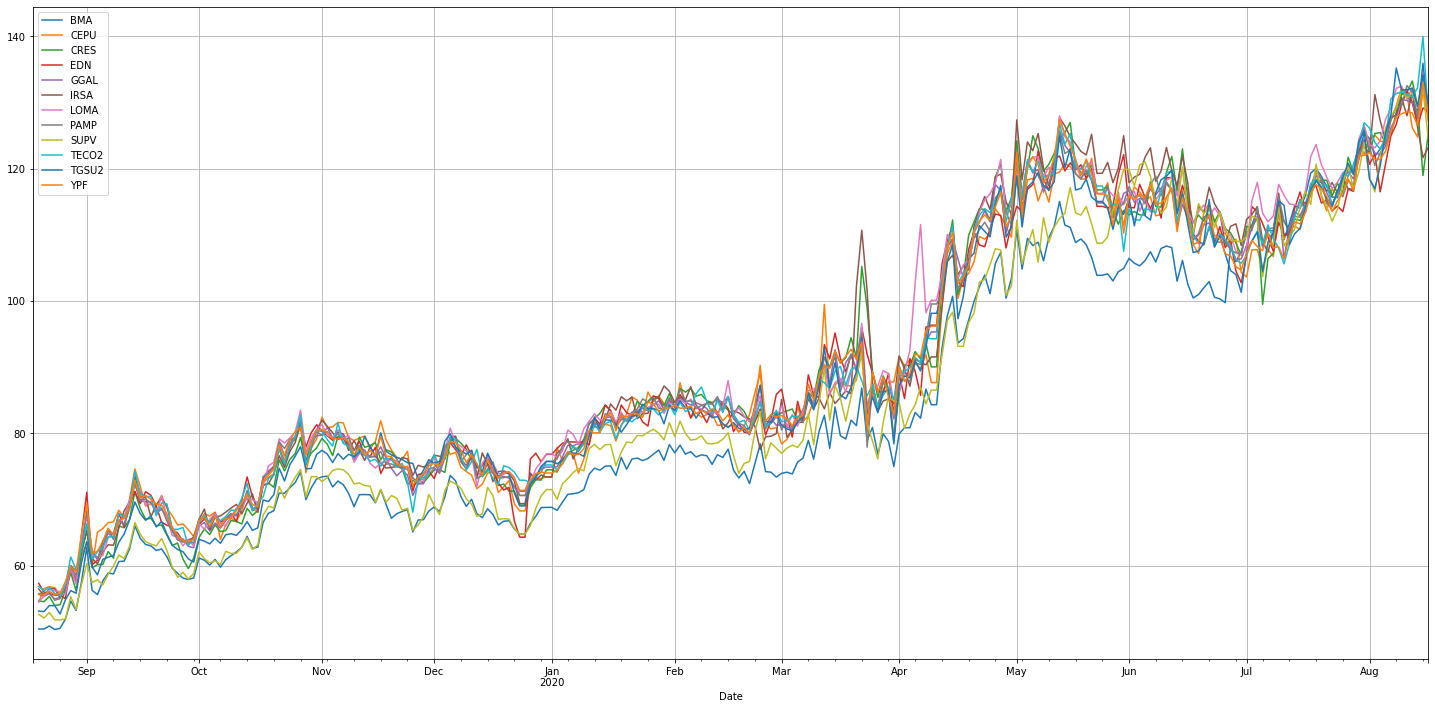

In [5]:
ca = cable.plot(figsize=(25,12))
ca.grid()

Evolución del Dolar de Mercado Promedio vs. el Dolar Oficial

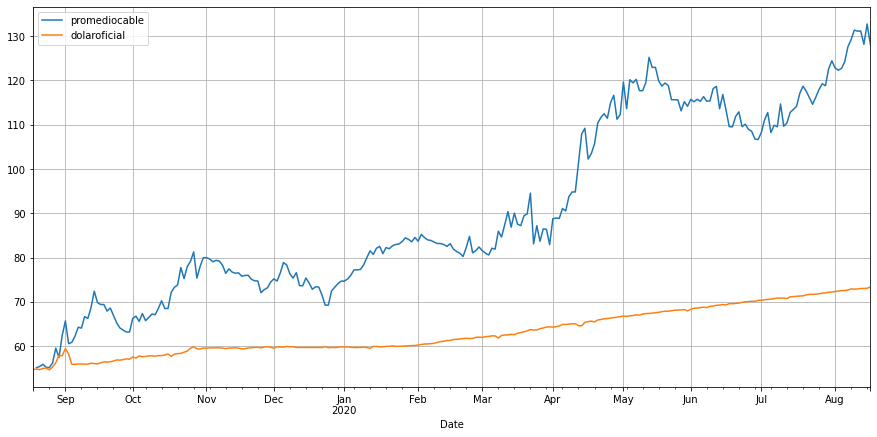

In [7]:
cabb = cab.plot(figsize=(15,7))
cabb.grid()

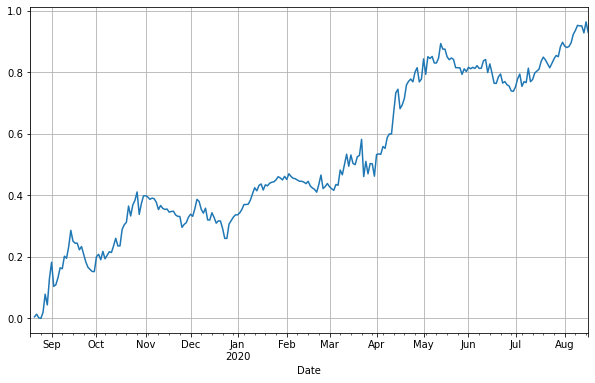

In [8]:
adrmedio = cab.promediocable.pct_change().cumsum().plot(figsize=(10,6))
adrmedio.grid()

Desde Agosto 2019 a hoy, el peso ha perdido el 80% de su valor. Lo que nos dice 
que mensualmente debemos solicitar que rinda casi 7% mes a mes de forma segura
para invertir bajo la mínima pretensión de mantener el valor de nuestro dinero
en el transcurso del tiempo

c:\users\pc\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


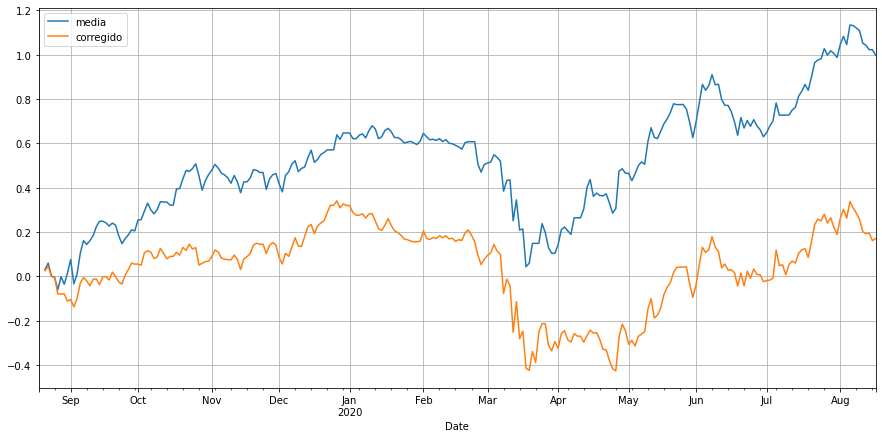

In [17]:
# ¿El Merval protegio el valor de nuestro dinero durante ese período? Veamos.

merval = pd.DataFrame(None) 
merval['BMABA'] = data.BMABA
merval['CEPUBA'] = data.CEPUBA
merval['CRESBA'] = data.CRESBA
merval['EDNBA'] = data.EDNBA
merval['GGALBA'] = data.GGALBA
merval['IRSABA'] = data.IRSABA
merval['LOMABA'] = data.LOMABA
merval['SUPVBA'] = data.SUPVBA
merval['TECO2BA'] = data.TECO2BA
merval['TGSU2BA'] = data.TGSU2BA
merval['YPFDBA'] = data.YPFDBA

mervalpromedio = pd.DataFrame(index=merval.index)
mervalpromedio['media'] = merval.T.median()
mervalpromedio['corregido'] = mervalpromedio.media / cab.promediocable

merv = mervalpromedio.pct_change().cumsum().plot(figsize=(15,7))
merv.grid()

Podemos observar que el Merval no es una opción de estabilidad para nuestros ahorros, expuesto a los vaivenes políticos del riesgo argentino. 
Entonces analizamos el mismo rendimiento de CEDEARS como alternativa (CErtificado de DEpósito ARgentino)por el cuál empresas como Apple, Microsoft, Intel, Walmart, Barrick Gold, Coca Cola, Tesla y otras empresas internacionales acceden al mercado argentino a un título convertido en pesos dolarizados (atados al tipo de cambio del mercado)

[*********************100%***********************]  2 of 2 completed


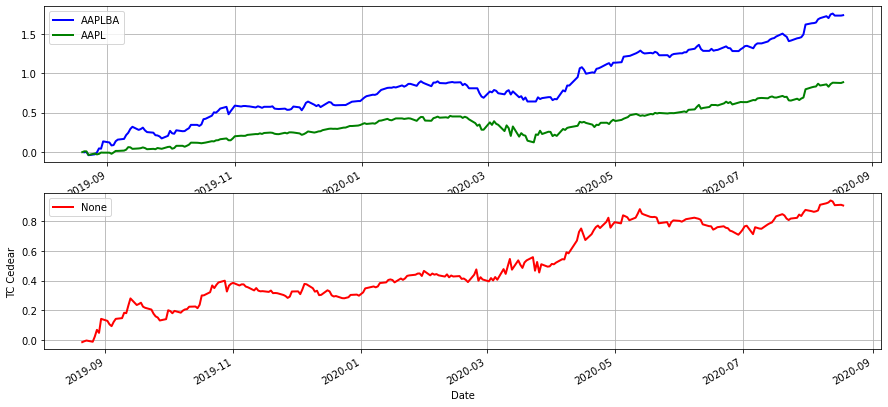

In [20]:
# Observamos el caso de Apple, ver que factores atribuyen la rentabilidad de su cedear

cedear = yahoo.download("AAPL AAPL.BA", period="1y")['Adj Close'].fillna(method='ffill')
cedear = cedear.rename(columns={'AAPL.BA':'AAPLBA'})

tc_apple = (cedear.AAPLBA / cedear.AAPL) * 10 

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
cedear.AAPLBA.pct_change().cumsum().plot(ax=ax1, color='b', lw=2., legend=True)
cedear.AAPL.pct_change().cumsum().plot(ax=ax1, color='g', lw=2., legend=True)
ax1.grid()
ax2 = fig.add_subplot(212, ylabel='TC Cedear')
tc_apple.pct_change().cumsum().plot(ax=ax2, color='r', lw=2., legend=True)
ax2.grid()
plt.show()



Lección: observamos que el cedear de Apple (APPL.BA) rinde un 80% por encime del activo que hace de referencia de Estados Unidos. Esto se debe a que el activo esta amparado de la devaluación cambiaria como de la inflación argentina. Siendo las CEDEARS nuestra opción de libre de riesgo más disponible en nuestro mercado.